In [1]:
import numpy as np
from qiskit.circuit.random import random_circuit
circuit = random_circuit(7, 6, max_operands=2, seed=1242)
# circuit.draw("mpl", scale=0.8)

In [2]:
from azure.quantum import Workspace
from azure.quantum.qiskit import AzureQuantumProvider

def init_resource_estimator():
    workspace = Workspace (
    resource_id = "/subscriptions/e0d51919-2dda-4b7e-a8e7-77cc18580acb/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/QECBenchmarking",
    location = "uksouth"
    )
    provider = AzureQuantumProvider(workspace)
    backend_est = provider.get_backend('microsoft.estimator')

    return backend_est

In [3]:
backend = init_resource_estimator()
# backend = None

.....................................Found solution using 2 cuts with a sampling overhead of 127.06026169907257.
Wire Cut at circuit instruction index 19
Gate Cut at circuit instruction index 28
change in Q -26730
change in t 226800
change in T -184


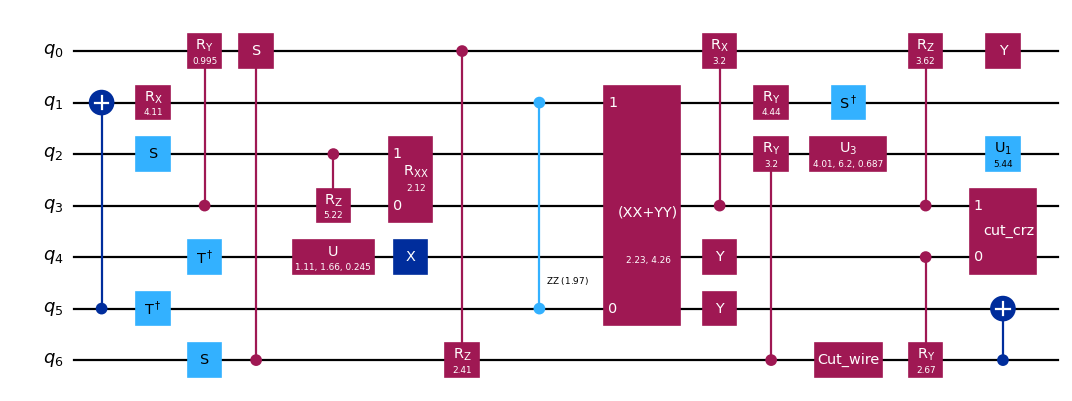

In [4]:
from ckt.circuit_knitting.cutting.automated_cut_finding import (
    find_cuts,
    test,
    OptimizationParameters,
    DeviceConstraints,
)

# Specify settings for the cut-finding optimizer
optimization_settings = OptimizationParameters(seed=111)

# Specify the size of the QPUs available
device_constraints = DeviceConstraints(qubits_per_subcircuit=4)

# cut_circuit, metadata = find_cuts(circuit, optimization_settings, device_constraints)
cut_circuit, metadata = find_cuts(circuit, backend, optimization_settings, device_constraints)

print(
    f'Found solution using {len(metadata["cuts"])} cuts with a sampling '
    f'overhead of {metadata["sampling_overhead"]}.'
)
for cut in metadata["cuts"]:
    print(f"{cut[0]} at circuit instruction index {cut[1]}")
print("change in Q", metadata["change_in_Q"])
print("change in t", metadata["change_in_t"])
print("change in T", metadata["change_in_T"])

cut_circuit.draw("mpl", scale=0.8, fold=-1)